In [247]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import ast

In [5]:
df=pd.read_csv(r"C:\Users\ibrah\Datasets\movie_rating_dataset\tmdb_5000_movies.csv")

In [7]:
df_copy=df.copy()

## Data control

In [9]:
df_copy.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Duplicated Control

In [13]:
df_copy[df_copy["original_title"].duplicated()]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [17]:
# 2 of our film names look the same. These name are Out of the Blue and Batman
df_copy[(df_copy["original_title"] =="Out of the Blue") | (df_copy["original_title"] == "Batman")]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [19]:
'''
The titles within this tag are the same but were published on different dates.
Note this next to the names in the duplicate values
'''
df_copy.at[4267, "original_title"] = 'Batman(1966)'
df_copy.at[3693, "original_title"] = 'Out of the Blue(2006)'
df_copy.at[3647, "original_title"] = 'Out of the Blue(1980)'
df_copy.at[3647, "original_title"] = 'Batman(1980)'


In [23]:
df[df_copy["original_title"].duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


# Organisation of the names in the columns

***
'''
The display of some of the above data is very complex, in particular film genres, keywords,
production companies and production countries

To eliminate this complexity, we will use the ast module in Python. 
The ast (Abstract Syntax Trees) module in Python is a tool for analysing and manipulating the syntax of Python code.
This module allows to analyse Python code to manipulate or examine it in different ways.
'''

***

In [28]:

df_copy["genres"]=df_copy["genres"].apply(eval)


'\nThe display of some of the above data is very complex, in particular film genres, keywords,\nproduction companies and production countries\n\nTo eliminate this complexity, we will use the ast module in Python. \nThe ast (Abstract Syntax Trees) module in Python is a tool for analysing and manipulating the syntax of Python code.\nThis module allows to analyse Python code to manipulate or examine it in different ways.\n'

In [29]:
df_copy["keywords"]=df_copy["keywords"].apply(eval)
df_copy["production_companies"]=df_copy["production_companies"].apply(eval)
df_copy["production_countries"]=df_copy["production_countries"].apply(eval)
                                          

In [30]:

'''
The genres variables written in the type section are separated from the complex column. 
And saved in the same column in an orderly manner
'''
df_copy["genres"]=df_copy["genres"].apply(lambda x:','.join(item["name"] for item in x))

In [31]:
df_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",NaN,9367,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"Comedy,Romance",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"Comedy,Drama,Romance,TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,,http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": 

In [32]:
'''
Let's see the variables in the keyword column in a broad perspective.
For this we can check a few cells. Likewise, we will check later
'''
df_copy["keywords"][1]


[{'id': 270, 'name': 'ocean'},
 {'id': 726, 'name': 'drug abuse'},
 {'id': 911, 'name': 'exotic island'},
 {'id': 1319, 'name': 'east india trading company'},
 {'id': 2038, 'name': "love of one's life"},
 {'id': 2052, 'name': 'traitor'},
 {'id': 2580, 'name': 'shipwreck'},
 {'id': 2660, 'name': 'strong woman'},
 {'id': 3799, 'name': 'ship'},
 {'id': 5740, 'name': 'alliance'},
 {'id': 5941, 'name': 'calypso'},
 {'id': 6155, 'name': 'afterlife'},
 {'id': 6211, 'name': 'fighter'},
 {'id': 12988, 'name': 'pirate'},
 {'id': 157186, 'name': 'swashbuckler'},
 {'id': 179430, 'name': 'aftercreditsstinger'}]

In [33]:
'''
we have nothing to do with identity details
Let's write the same line of code for other values.
There is an important point here. item['name'] is linked to the name in the relevant cell
'''
df_copy["keywords"]=df_copy["keywords"].apply(lambda x:','.join(item["name"] for item in x))

In [34]:
df_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",NaN,9367,"united states–mexico barrier,legs,arms,paper k...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"Comedy,Romance",NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"Comedy,Drama,Romance,TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date,love at first sight,narration,investigati...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en

In [35]:
'''
In fact, we may not use some column values, 
but seeing all values properly will give us a great advantage in observing the data.
'''
df_copy["production_companies"][5]


[{'name': 'Columbia Pictures', 'id': 5},
 {'name': 'Laura Ziskin Productions', 'id': 326},
 {'name': 'Marvel Enterprises', 'id': 19551}]

In [36]:
'''
Be carefull name values;
Again 
'''
df_copy["production_companies"]=df_copy["production_companies"].apply(lambda x:','.join(item["name"] for item in x))


In [37]:
df_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",NaN,9367,"united states–mexico barrier,legs,arms,paper k...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,"[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"Comedy,Romance",NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"Comedy,Drama,Romance,TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date,love at first sight,narration,investigati...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures,Muse Entertainment Enter...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Cal

In [95]:
df_copy["production_countries"][152]

'China,United States of America'

In [ ]:
df_copy["production_countries"]=df_copy["production_countries"].apply(lambda x:','.join(item["name"] for item in x))

In [41]:
df_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",NaN,9367,"united states–mexico barrier,legs,arms,paper k...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,"Mexico,United States of America",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"Comedy,Romance",NaN,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"Comedy,Drama,Romance,TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date,love at first sight,narration,investigati...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures,Muse Entertainment Enter...",United States of America,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,,"United States of America,China",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


## Columnising publication_date dates

In [88]:
'''
This code should not be read more than 1. At this point,
it makes more sense to check the correctness of the dataframe we are working on by working on a copy of the dataframe we are working on. 
we can also apply the line of code that we have proven correct there on the main dataframe
'''
df_copy["year"]=pd.to_datetime(df2['release_date']).dt.year
df_copy['original_title'] = df_copy['original_title'] + '(' + df_copy["year"].astype(str) +')'

In [99]:
'''
Keeping the data related to the month can be an important data at the point of which month more films are released
'''
df_copy["month"]=pd.to_datetime(df2['release_date']).dt.month
df_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,month
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar(2009),"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,12.0
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End(2007),"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,5.0
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre(2015),A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,10.0
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises(2012),Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,7.0
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter(2012),"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action,Crime,Thriller",NaN,9367,"united states–mexico barrier,legs,arms,paper k...",es,El Mariachi(1992),El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,1992,9.0
4799,9000,"Comedy,Romance",NaN,72766,,en,Newlyweds(2011),A newlywed couple's honeymoon is upended by th...,0.642552,,...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,2011,12.0
4800,0,"Comedy,Drama,Romance,TV Movie",http://www.hallmarkchannel.com/signedsealeddel...,231617,"date,love at first sight,narration,investigati...",en,"Signed, Sealed, Delivered(2013)","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"Front Street Pictures,Muse Entertainment Enter...",...,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,2013,10.0
4801,0,,http://shanghaicalling.com/,126186,,en,Shanghai Calling(2012),When ambitious New York attorney Sam is sent t...,0.857008,,...,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,2012,5.0


In [90]:

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [100]:
'''
 We have completed the difficult to understand and useful edits in our code line.
 Now we need to pull the columns we can use. 
 But at this point I want to save the df_copy dataframe on the dataframe called df2 to keep it in backup.

'''

df2=df_copy.copy()

In [110]:
'''
let's simplify the table we have. 
'''
df3=df2.reindex(columns=["original_title","genres","original_language","production_countries","production_companies","release_date","year","month","budget","revenue","runtime","status","tagline","vote_average","vote_count","popularity"])

# df3 is ours a main dataframe

### This is because this dataframe structure is a data set that is organised by us and is complete at every point. According to the analysis of interest we will make use of this table 

***
We can print this file and edit it in any data visualisation application

***

In [111]:
'''
In the total data, we see that almost 20% of the data in the tagline column is missing. The total number of these missing data is 844.
The lack of these data makes it difficult for us to make inferences.
'''
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4803 non-null   object 
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   production_countries  4803 non-null   object 
 4   production_companies  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   year                  4803 non-null   int32  
 7   month                 4802 non-null   float64
 8   budget                4803 non-null   int64  
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  status                4803 non-null   object 
 12  tagline               0 non-null      float64
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
 15  popularity           

In [112]:
df3.drop("tagline",axis=1,inplace=True)

In [113]:
df3

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,budget,revenue,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12.0,237000000,2787965087,162.0,Released,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5.0,300000000,961000000,169.0,Released,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10.0,245000000,880674609,148.0,Released,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7.0,250000000,1084939099,165.0,Released,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3.0,260000000,284139100,132.0,Released,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9.0,220000,2040920,81.0,Released,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12.0,9000,0,85.0,Released,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10.0,0,0,120.0,Released,7.0,6,1.444476
4801,Shanghai Calling(2012),,en,"United States of America,China",,2012-05-03,2012,5.0,0,0,98.0,Released,5.7,7,0.857008


In [114]:
'''
query for empty elements in each column
'''
df3[df3["genres"].isna()]

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,budget,revenue,runtime,status,vote_average,vote_count,popularity


In [125]:
'''
When I examine the genres column, index number 4081 catches my eye. 
'''
df3.iloc[4081]

original_title                                Das Leben der Anderen(2006)
genres                                                     Drama,Thriller
original_language                                                      de
production_countries                                              Germany
production_companies    Arte,Wiedemann & Berg Filmproduktion,Creado Fi...
release_date                                                   2006-03-15
year                                                                 2006
month                                                                 3.0
budget                                                            2000000
revenue                                                          70000000
runtime                                                             137.0
status                                                           Released
vote_average                                                          7.9
vote_count                            

In [135]:
'''
genres are not empty

'''
df3[df3["genres"]=='']


,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,budget,revenue,runtime,status,vote_average,vote_count,popularity
3971,Iguana(1988),,en,,,1988-04-01,1988,4.0,0,0,88.0,Released,6.0,1,0.214704
3992,Sardaarji(2015),,en,India,,2015-06-26,2015,6.0,0,0,0.0,Released,9.5,2,0.296981
4068,Sharkskin(2015),,en,,,2015-01-01,2015,1.0,0,0,0.0,Released,0.0,0,0.027801
4105,"The Book of Mormon Movie, Volume 1: The Journe...",,en,,,2003-09-12,2003,9.0,2000000,1672730,120.0,Released,5.0,2,0.031947
4118,Hum To Mohabbat Karega(2000),,en,,,2000-05-26,2000,5.0,0,0,0.0,Released,0.0,0,0.001186
4293,The Algerian(2015),,en,"Algeria,United States of America",Zelko Films,2015-08-07,2015,8.0,1,0,99.0,Released,0.0,0,0.025364
4314,Crowsnest(2012),,en,Canada,,2012-01-01,2012,1.0,1200000,0,84.0,Released,4.8,12,0.057564
4385,Lisa Picard Is Famous(2000),,en,,,2000-05-14,2000,5.0,0,0,90.0,Released,4.0,1,0.690089
4400,Sparkler(1999),,en,,,1999-03-19,1999,3.0,0,0,96.0,Released,0.0,1,0.547654
4413,Childless(2015),,en,United States of America,,2015-04-03,2015,4.0,0,0,90.0,Released,4.5,2,0.243853


In [142]:
df3[df3["genres"]=='']["genres"].value_counts()


genres
    28
Name: count, dtype: int64

In [147]:
df3[df3["genres"] == ''].shape[0]

28

In [149]:
'''
Since the number of empty values is small, we manually searched the internet and added the film genres
'''
df3.loc[df3["genres"] == '', "genres"] = ["Adventure,Crime,Drama", "Comedy,Fantasy", "Thriller,Romance", "Adventure,Drama", "Action,Romance,Drama", "Action,Romance,Thriller", "Thriller,Romance", "Horror", "Comedy,Drama", "Drama", "Drama", "Action,Drama", "Drama", 'comedy', 'action', None, None, None, None, 'Filmacres', None, None, None, None, None, None, None, None]


In [154]:
df3

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,budget,revenue,runtime,status,vote_average,vote_count,popularity,Genres
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12.0,237000000,2787965087,162.0,Released,7.2,11800,150.437577,NaN
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5.0,300000000,961000000,169.0,Released,6.9,4500,139.082615,NaN
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10.0,245000000,880674609,148.0,Released,6.3,4466,107.376788,NaN
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7.0,250000000,1084939099,165.0,Released,7.6,9106,112.312950,NaN
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3.0,260000000,284139100,132.0,Released,6.1,2124,43.926995,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9.0,220000,2040920,81.0,Released,6.6,238,14.269792,NaN
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12.0,9000,0,85.0,Released,5.9,5,0.642552,NaN
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10.0,0,0,120.0,Released,7.0,6,1.444476,NaN
4801,Shanghai Calling(2012),None,en,"United States of America,China",,2012-05-03,2012,5.0,0,0,98.0,Released,5.7,7,0.857008,NaN


In [155]:
'''
Again backup
'''
df4=df3.copy()

In [156]:
'''
Now let's check the values in the original_language and other column.

'''
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4803 non-null   object 
 1   genres                4791 non-null   object 
 2   original_language     4803 non-null   object 
 3   production_countries  4803 non-null   object 
 4   production_companies  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   year                  4803 non-null   int32  
 7   month                 4802 non-null   float64
 8   budget                4803 non-null   int64  
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  status                4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  popularity            4803 non-null   float64
 15  Genres               

In [179]:
'''
15. column is empty
'''
df3.reindex(columns=["original_title","genres","original_language","production_countries","production_companies","release_date","year","month","budget","revenue","runtime","status","tagline","vote_average","vote_count","popularity"])

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,budget,revenue,runtime,status,tagline,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12.0,237000000,2787965087,162.0,Released,NaN,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5.0,300000000,961000000,169.0,Released,NaN,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10.0,245000000,880674609,148.0,Released,NaN,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7.0,250000000,1084939099,165.0,Released,NaN,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3.0,260000000,284139100,132.0,Released,NaN,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9.0,220000,2040920,81.0,Released,NaN,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12.0,9000,0,85.0,Released,NaN,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10.0,0,0,120.0,Released,NaN,7.0,6,1.444476
4801,Shanghai Calling(2012),None,en,"United States of America,China",,2012-05-03,2012,5.0,0,0,98.0,Released,NaN,5.7,7,0.857008


In [186]:
'''
With the fillna function, we filled the empty values with the next value.
This is done because we think that the number of empty values will not affect our analysis.

'''
df3.fillna(method='backfill',inplace=True)



In [187]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4803 non-null   object 
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   production_countries  4803 non-null   object 
 4   production_companies  4803 non-null   object 
 5   release_date          4803 non-null   object 
 6   year                  4803 non-null   int32  
 7   month                 4803 non-null   float64
 8   budget                4803 non-null   int64  
 9   revenue               4803 non-null   int64  
 10  runtime               4803 non-null   float64
 11  status                4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  popularity            4803 non-null   float64
 15  Genres               

In [193]:
df3=df3.reindex(columns=["original_title","genres","original_language","production_countries","production_companies","release_date","year","month","budget","revenue","runtime","status","vote_average","vote_count","popularity"])

In [194]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4803 non-null   object 
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   production_countries  4803 non-null   object 
 4   production_companies  4803 non-null   object 
 5   release_date          4803 non-null   object 
 6   year                  4803 non-null   int32  
 7   month                 4803 non-null   float64
 8   budget                4803 non-null   int64  
 9   revenue               4803 non-null   int64  
 10  runtime               4803 non-null   float64
 11  status                4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  popularity            4803 non-null   float64
dtypes: float64(4), int32(

In [199]:
'''
runtime display is incomprehensible 
'''


df3["month"]=df3["month"].astype(int)

In [201]:
df3

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,budget,revenue,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12,237000000,2787965087,162.0,Released,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5,300000000,961000000,169.0,Released,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10,245000000,880674609,148.0,Released,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7,250000000,1084939099,165.0,Released,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3,260000000,284139100,132.0,Released,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9,220000,2040920,81.0,Released,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12,9000,0,85.0,Released,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10,0,0,120.0,Released,7.0,6,1.444476
4801,Shanghai Calling(2012),Documentary,en,"United States of America,China",,2012-05-03,2012,5,0,0,98.0,Released,5.7,7,0.857008


In [267]:
'''
We can also analyse the day variable. For this reason, 
let's add the day variables to a column and then we can analyse it

'''
# Convert the 'release_date' column to datetime format
df3['release_date'] = pd.to_datetime(df3['release_date'])

# Let's find out which day the desired dates are and assign them to the 'Day' column
df3["Day"] = df3['release_date'].dt.day_name()

df3=df3.reindex(columns=["original_title","genres","original_language","production_countries","production_companies","release_date","year","month","Day","budget","revenue","runtime","status","vote_average","vote_count","popularity"])
df3

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,Day,budget,revenue,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12,Thursday,237000000,2787965087,162.0,Released,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5,Saturday,300000000,961000000,169.0,Released,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10,Monday,245000000,880674609,148.0,Released,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7,Monday,250000000,1084939099,165.0,Released,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3,Wednesday,260000000,284139100,132.0,Released,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9,Friday,220000,2040920,81.0,Released,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12,Monday,9000,0,85.0,Released,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10,Sunday,0,0,120.0,Released,7.0,6,1.444476
4801,Shanghai Calling(2012),Documentary,en,"United States of America,China",,2012-05-03,2012,5,Thursday,0,0,98.0,Released,5.7,7,0.857008


### we now have a neat table on which we can make analyses 

In [207]:
'''
we see that some budget values are empty.

'''

df3[df3["budget"]==0]["budget"].value_counts()

budget
0    1037
Name: count, dtype: int64

In [208]:
'''
Also we see that some revenue values are empty.
'''

df3[df3["revenue"]==0]["revenue"].value_counts()

revenue
0    1427
Name: count, dtype: int64

***In two different variables, there are 1037 cells with 0 value in budget and 1427 cells with 0 value in revenue variable. When a detailed research is done, it is impossible for a production to have 0 values such as budget revenue. These values are either not published, or no such information is registered on the web scraping site. Or incorrect web scraping may have been done.***

In [270]:
'''
Top 10 Budget Value
'''
Top10_Budget=df3.sort_values(by='budget', ascending=False)
Top10_Budget=Top10_Budget.head(10)

In [271]:
Top10_Budget

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,Day,budget,revenue,runtime,status,vote_average,vote_count,popularity
17,Pirates of the Caribbean: On Stranger Tides(2011),"Adventure,Action,Fantasy",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,M...",2011-05-14,2011,5,Saturday,380000000,1045713802,136.0,Released,6.4,4948,135.413856
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5,Saturday,300000000,961000000,169.0,Released,6.9,4500,139.082615
7,Avengers: Age of Ultron(2015),"Action,Adventure,Science Fiction",en,United States of America,"Marvel Studios,Prime Focus,Revolution Sun Studios",2015-04-22,2015,4,Wednesday,280000000,1405403694,141.0,Released,7.3,6767,134.279229
10,Superman Returns(2006),"Adventure,Fantasy,Action,Science Fiction",en,United States of America,"DC Comics,Legendary Pictures,Warner Bros.,Bad ...",2006-06-28,2006,6,Wednesday,270000000,391081192,154.0,Released,5.4,1400,57.925623
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3,Wednesday,260000000,284139100,132.0,Released,6.1,2124,43.926995
6,Tangled(2010),"Animation,Family",en,United States of America,"Walt Disney Pictures,Walt Disney Animation Stu...",2010-11-24,2010,11,Wednesday,260000000,591794936,100.0,Released,7.4,3330,48.681969
5,Spider-Man 3(2007),"Fantasy,Action,Adventure",en,United States of America,"Columbia Pictures,Laura Ziskin Productions,Mar...",2007-05-01,2007,5,Tuesday,258000000,890871626,139.0,Released,5.9,3576,115.699814
13,The Lone Ranger(2013),"Action,Adventure,Western",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,I...",2013-07-03,2013,7,Wednesday,255000000,89289910,149.0,Released,5.9,2311,49.046956
46,X-Men: Days of Future Past(2014),"Action,Adventure,Fantasy,Science Fiction",en,"United Kingdom,United States of America","Twentieth Century Fox Film Corporation,Donners...",2014-05-15,2014,5,Thursday,250000000,747862775,131.0,Released,7.5,6032,118.078691
22,The Hobbit: The Desolation of Smaug(2013),"Adventure,Fantasy",en,"New Zealand,United States of America","WingNut Films,New Line Cinema,Warner Bros. Pic...",2013-12-11,2013,12,Wednesday,250000000,958400000,161.0,Released,7.6,4524,94.370564


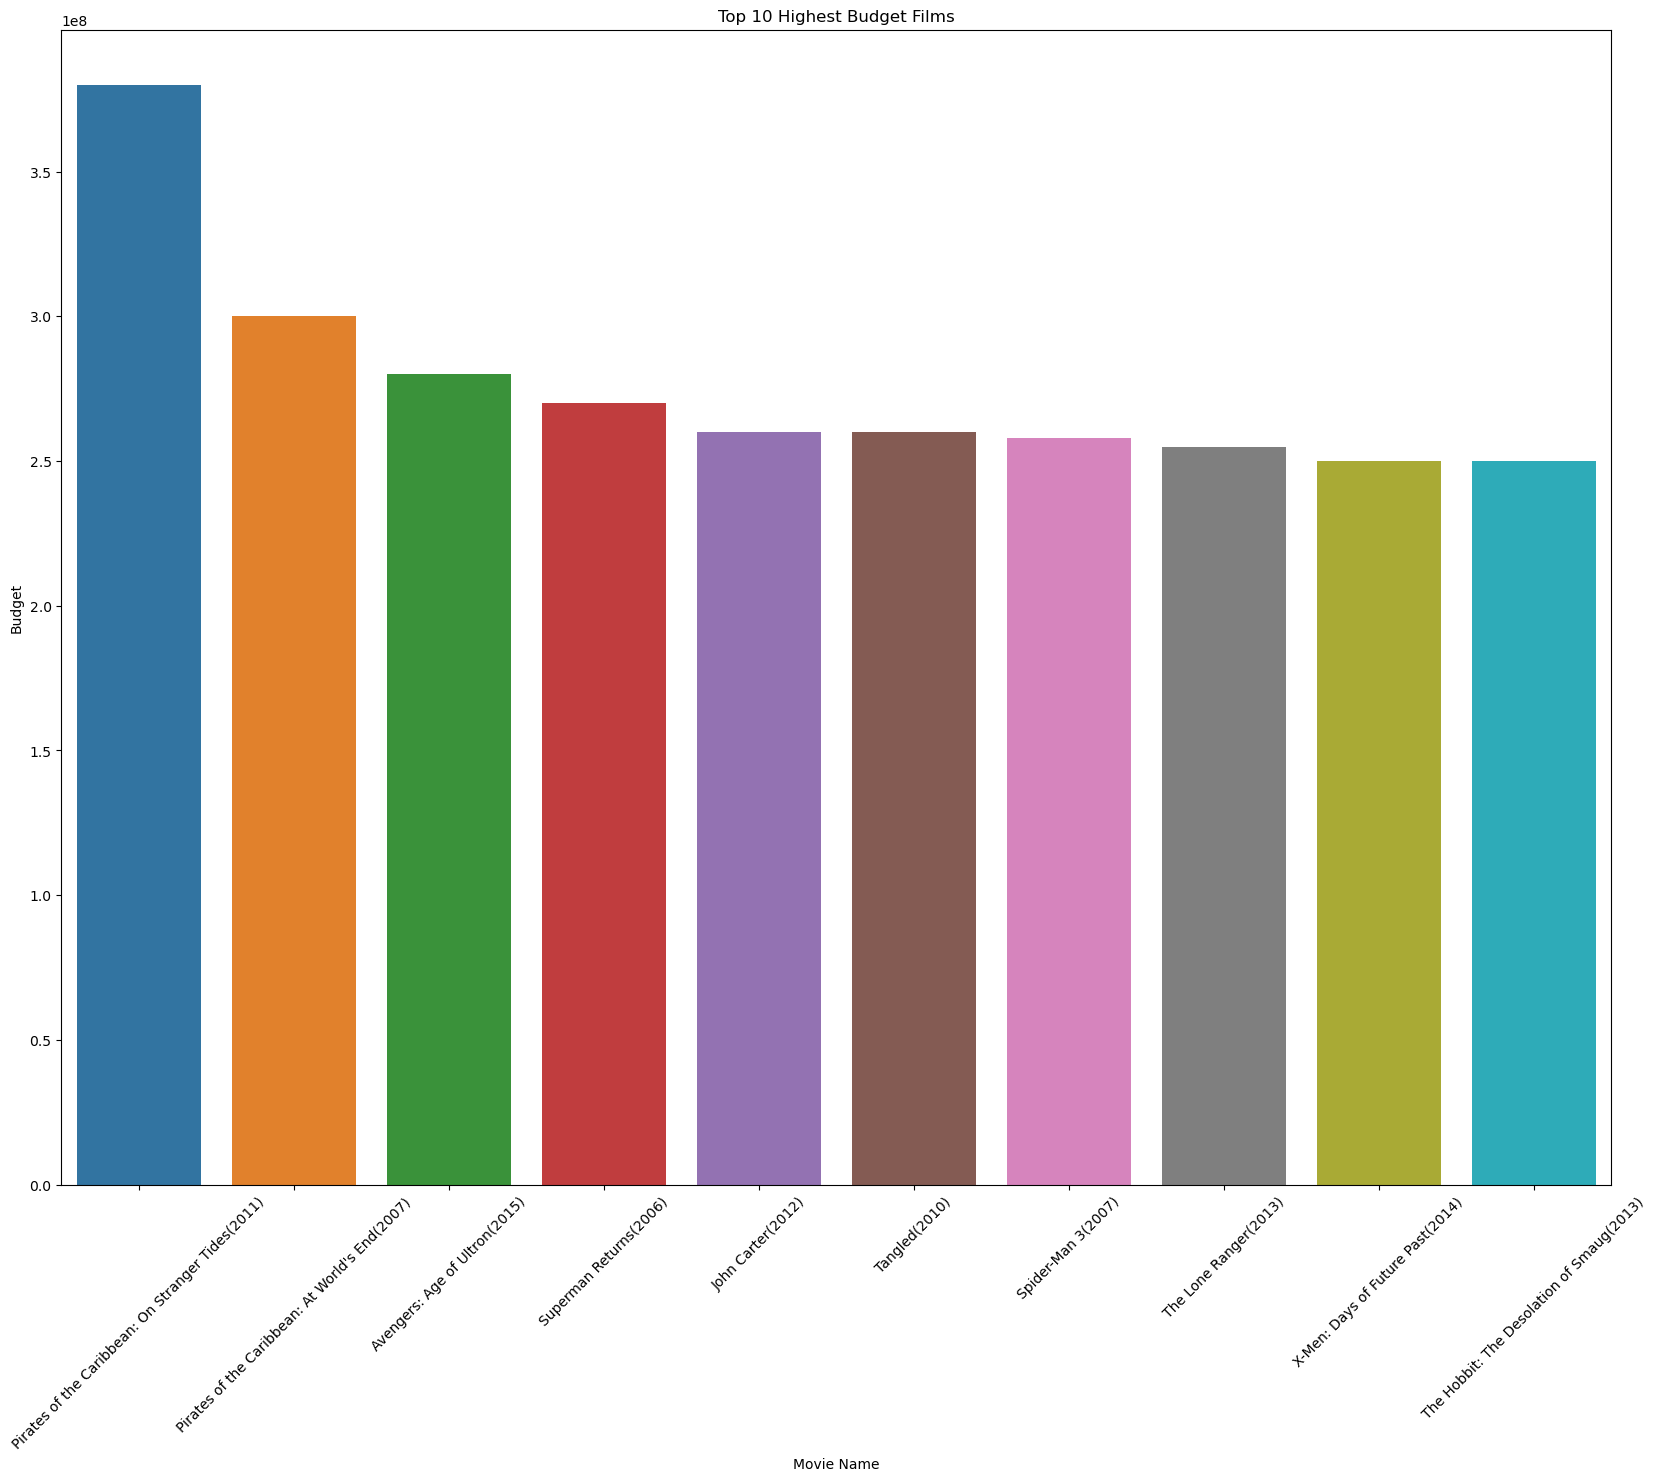

In [281]:
'''
Top 10 Budget Value
'''
plt.figure(figsize=(20, 15))

sns.barplot(x="original_title", y="budget", data=Top10_Budget)

plt.xlabel('Movie Name')
plt.ylabel('Budget')
plt.title('Top 10 Highest Budget Films')
plt.xticks(rotation=45)
plt.show()

In [309]:
Top10_Budget["genres"].value_counts()

genres
Action,Adventure,Science Fiction            2
Adventure,Action,Fantasy                    1
Adventure,Fantasy,Action                    1
Adventure,Fantasy,Action,Science Fiction    1
Animation,Family                            1
Fantasy,Action,Adventure                    1
Action,Adventure,Western                    1
Action,Adventure,Fantasy,Science Fiction    1
Adventure,Fantasy                           1
Name: count, dtype: int64

# Movie genre ranking by Top10_Budget chart 


In [310]:
'''
# Let's find the number of each type on Top10_Budget_dataset
'''
split_genres = Top10_Budget['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
split_genres.name = 'genre'
df_genres = Top10_Budget.drop('genres', axis=1).join(split_genres)

genre_counts = df_genres['genre'].value_counts()


In [311]:
genre_counts

genre
Adventure          9
Action             8
Fantasy            6
Science Fiction    4
Animation          1
Family             1
Western            1
Name: count, dtype: int64

In [318]:
df_genre_counts_budget=pd.DataFrame(data=genre_counts)
df_genre_counts_budget

,count
genre,
Adventure,9
Action,8
Fantasy,6
Science Fiction,4
Animation,1
Family,1
Western,1


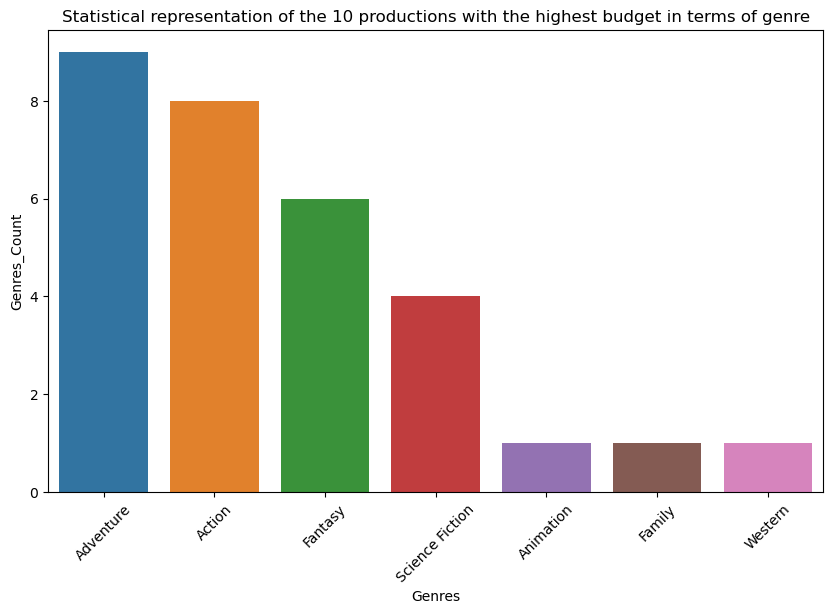

In [420]:

'''
I edited the data individually as there was a slight mismatch
'''
# Our dataa
data = {
    'genre': ['Adventure', 'Action', 'Fantasy', 'Science Fiction', 'Animation', 'Family', 'Western'],
    'count': [9, 8, 6, 4, 1, 1, 1]
}
df_genre_counts_budget = pd.DataFrame(data)


plt.figure(figsize=(10, 6))

sns.barplot(x="genre", y="count", data=df_genre_counts_budget)

plt.xlabel('Genres')
plt.ylabel('Genres_Count')
plt.title('Statistical representation of the 10 productions with the highest budget in terms of genre')

plt.xticks(rotation=45)

plt.show()

In [268]:
'''
Top 10 Revenue Value
'''
Top10_revenue=df3.sort_values(by='revenue', ascending=False)
Top10_revenue=Top10_revenue.head(10)
Top10_revenue

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,Day,budget,revenue,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12,Thursday,237000000,2787965087,162.0,Released,7.2,11800,150.437577
25,Titanic(1997),"Drama,Romance,Thriller",en,United States of America,"Paramount Pictures,Twentieth Century Fox Film ...",1997-11-18,1997,11,Tuesday,200000000,1845034188,194.0,Released,7.5,7562,100.025899
16,The Avengers(2012),"Science Fiction,Action,Adventure",en,United States of America,"Paramount Pictures,Marvel Studios",2012-04-25,2012,4,Wednesday,220000000,1519557910,143.0,Released,7.4,11776,144.448633
28,Jurassic World(2015),"Action,Adventure,Science Fiction,Thriller",en,United States of America,"Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,2015,6,Tuesday,150000000,1513528810,124.0,Released,6.5,8662,418.708552
44,Furious 7(2015),Action,en,"Japan,United States of America","Universal Pictures,Original Film,Fuji Televisi...",2015-04-01,2015,4,Wednesday,190000000,1506249360,137.0,Released,7.3,4176,102.322217
7,Avengers: Age of Ultron(2015),"Action,Adventure,Science Fiction",en,United States of America,"Marvel Studios,Prime Focus,Revolution Sun Studios",2015-04-22,2015,4,Wednesday,280000000,1405403694,141.0,Released,7.3,6767,134.279229
124,Frozen(2013),"Animation,Adventure,Family",en,United States of America,"Walt Disney Pictures,Walt Disney Animation Stu...",2013-11-27,2013,11,Wednesday,150000000,1274219009,102.0,Released,7.3,5295,165.125366
31,Iron Man 3(2013),"Action,Adventure,Science Fiction",en,"China,United States of America",Marvel Studios,2013-04-18,2013,4,Thursday,200000000,1215439994,130.0,Released,6.8,8806,77.682080
546,Minions(2015),"Family,Animation,Adventure,Comedy",en,United States of America,"Universal Pictures,Illumination Entertainment",2015-06-17,2015,6,Wednesday,74000000,1156730962,91.0,Released,6.4,4571,875.581305
26,Captain America: Civil War(2016),"Adventure,Action,Science Fiction",en,United States of America,"Studio Babelsberg,Marvel Studios,Walt Disney S...",2016-04-27,2016,4,Wednesday,250000000,1153304495,147.0,Released,7.1,7241,198.372395


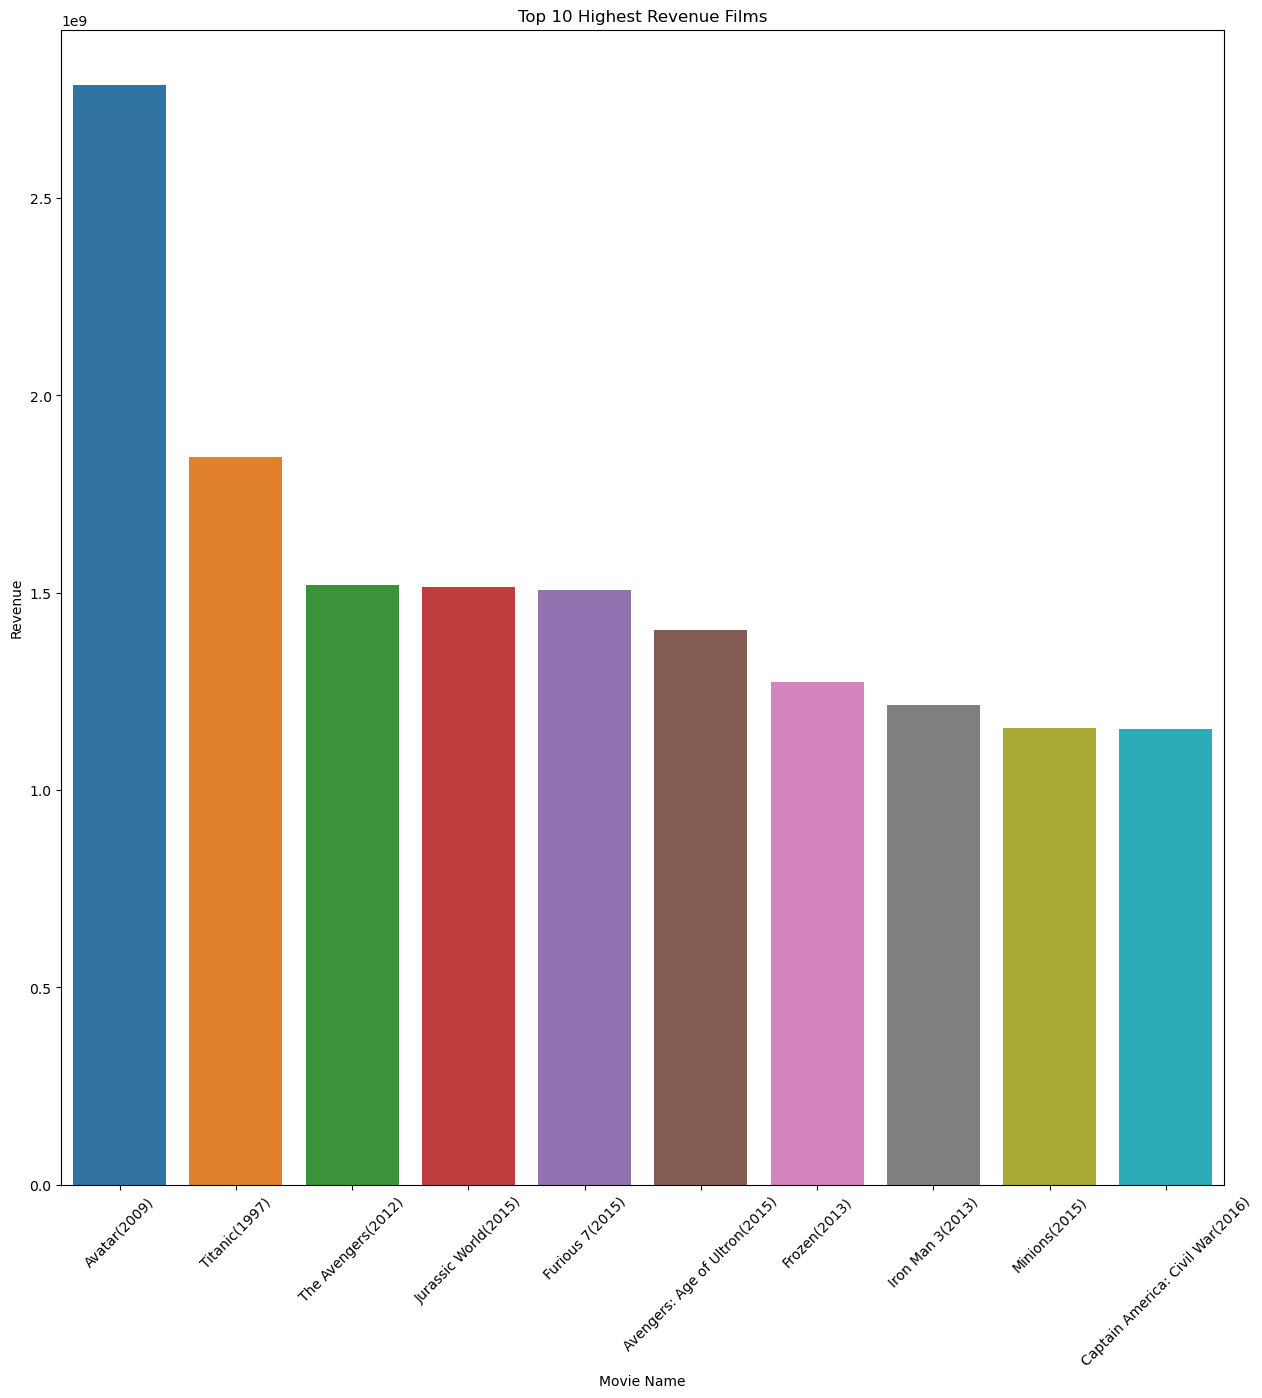

In [342]:
'''
Top 10 Revenue visualisation
'''
plt.figure(figsize=(15, 15))

sns.barplot(x="original_title", y="revenue", data=Top10_revenue)

plt.xlabel('Movie Name')
plt.ylabel('Revenue')
plt.title('Top 10 Highest Revenue Films')
plt.xticks(rotation=45)
plt.show()

In [315]:
Top10_revenue["genres"].value_counts()

genres
Action,Adventure,Science Fiction             2
Action,Adventure,Fantasy,Science Fiction     1
Drama,Romance,Thriller                       1
Science Fiction,Action,Adventure             1
Action,Adventure,Science Fiction,Thriller    1
Action                                       1
Animation,Adventure,Family                   1
Family,Animation,Adventure,Comedy            1
Adventure,Action,Science Fiction             1
Name: count, dtype: int64

# Movie genre ranking by Top10_Revenue chart 


In [321]:
split_genres_1= Top10_revenue['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
split_genres_1.name = 'genre'
df_genres_revenue = Top10_revenue.drop('genres', axis=1).join(split_genres_1)
genre_counts_revenue = df_genres_revenue['genre'].value_counts()

In [324]:
genre_counts_revenue

genre
Adventure          8
Action             7
Science Fiction    6
Thriller           2
Animation          2
Family             2
Fantasy            1
Drama              1
Romance            1
Comedy             1
Name: count, dtype: int64

In [332]:
df_genre_counts_revenue=pd.DataFrame(genre_counts_revenue)
df_genre_counts_revenue

,count
genre,
Adventure,8
Action,7
Science Fiction,6
Thriller,2
Animation,2
Family,2
Fantasy,1
Drama,1
Romance,1


In [320]:
genre_counts_revenue

genre
Action             1
Adventure          1
Science Fiction    1
Name: count, dtype: int64

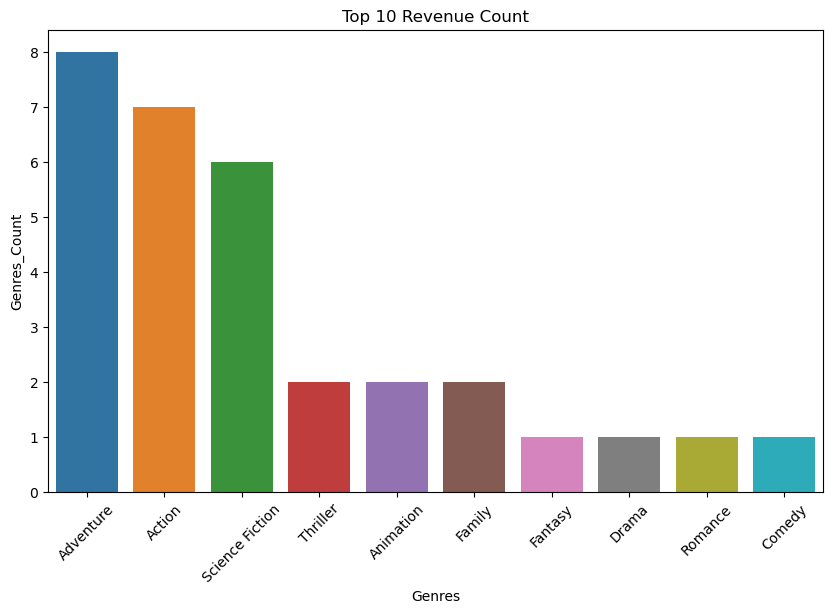

In [330]:

'''
I edited the data individually as there was a slight mismatch
'''
# Our dataa
data1 = {
        'genre': ['Adventure', 'Action', 'Science Fiction', 'Thriller', 'Animation', 'Family', 'Fantasy', 'Drama', 'Romance', 'Comedy'],
        'count': [8, 7, 6, 2, 2, 2, 1, 1, 1, 1]
         }
df_genre_counts_revenue = pd.DataFrame(data1)


plt.figure(figsize=(10, 6))

sns.barplot(x="genre", y="count", data=df_genre_counts_revenue)

plt.xlabel('Genres')
plt.ylabel('Genres_Count')
plt.title('Top 10 Revenue Count')

plt.xticks(rotation=45)

plt.show()

# Conclusions based on top 10 Revenue and top 10 Budget dataframes

In [340]:
budget_revenue_pd=pd.merge(left=df_genre_counts_budget,right=df_genre_counts_revenue,on="genre",how="outer")
budget_revenue_pd.rename(columns={'count_x': 'budget',
                                 'count_y': 'revenue'}, inplace=True)
budget_revenue_pd

,budget,revenue
genre,,
Adventure,9.0,8.0
Action,8.0,7.0
Fantasy,6.0,1.0
Science Fiction,4.0,6.0
Animation,1.0,2.0
Family,1.0,2.0
Western,1.0,NaN
Thriller,NaN,2.0
Drama,NaN,1.0


***As a result of this analysis, we see the productions in the adventure and action genres according to the top 10 names over the Budget value. As a result of this analysis, we can especially say that. The majority of high grossing films consist of action and adventure films.***

***
The analysis we have made as a result of this analysis. It can be shaped according to need. For example, the rating average of 10 films with high revenue can be taken. But in order not to be crowded in the code line, I will save those examples for the result of the analysis I will make on the general table.
***

***When we made a simple analysis of the data provided as a result of the revenue analyses, we saw the names of the highest grossing films. Our aim is not to determine the accuracy of the data set presented. To create a visuality and layout ready for appropriate presentation from the given data set***

In [344]:
#it is always important to have backups
df4=df3.copy()

In [345]:
df4

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,Day,budget,revenue,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12,Thursday,237000000,2787965087,162.0,Released,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5,Saturday,300000000,961000000,169.0,Released,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10,Monday,245000000,880674609,148.0,Released,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7,Monday,250000000,1084939099,165.0,Released,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3,Wednesday,260000000,284139100,132.0,Released,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9,Friday,220000,2040920,81.0,Released,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12,Monday,9000,0,85.0,Released,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10,Sunday,0,0,120.0,Released,7.0,6,1.444476
4801,Shanghai Calling(2012),Documentary,en,"United States of America,China",,2012-05-03,2012,5,Thursday,0,0,98.0,Released,5.7,7,0.857008


#### I delete my budget and revenue columns I made before

In [346]:
df4.drop(columns=["budget","revenue"],axis=1,inplace=True)

In [347]:
df4

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,Day,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12,Thursday,162.0,Released,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5,Saturday,169.0,Released,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10,Monday,148.0,Released,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7,Monday,165.0,Released,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3,Wednesday,132.0,Released,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9,Friday,81.0,Released,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12,Monday,85.0,Released,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10,Sunday,120.0,Released,7.0,6,1.444476
4801,Shanghai Calling(2012),Documentary,en,"United States of America,China",,2012-05-03,2012,5,Thursday,98.0,Released,5.7,7,0.857008


## Original Language Count Statistic

In [421]:
original_language_df=pd.DataFrame(data=df4["original_language"].value_counts())
original_language_df.head(10)

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


## Year Statistic

In [364]:
year_df=pd.DataFrame(data=df4["year"].value_counts())
year_df.head(20)


,count
year,
2009,247
2014,238
2006,237
2013,231
2008,227
2010,225
2011,223
2005,217
2015,216


In [380]:
month_df=pd.DataFrame(data=df4["month"].value_counts())
month_df

,count
month,
9,588
10,474
12,456
8,413
6,389
1,382
3,373
5,363
7,363


In [402]:
month_df=pd.DataFrame(data=df4["month"].value_counts())
df_sorted_month = month_df.sort_values(by='month')
mouth_sorted=df_sorted_month.to_dict()
mouth_sorted

{'count': {1: 382,
  2: 326,
  3: 373,
  4: 350,
  5: 363,
  6: 389,
  7: 363,
  8: 413,
  9: 588,
  10: 474,
  11: 326,
  12: 456}}

## Seasonal Statistic

In [413]:


winter= sum(mouth_sorted['count'][month] for month in [1, 2, 12])
spring= sum(mouth_sorted['count'][month] for month in [3, 4, 5])
summer= sum(mouth_sorted['count'][month] for month in [6,7,8])
fall= sum(mouth_sorted['count'][month] for month in [9,10,11])

sum_season=pd.DataFrame(data=[winter,spring,summer,fall],index=["winter","spring","summer","fall"])
sum_season.rename(columns={0:"count"},inplace=True)
sum_season

,count
winter,1164
spring,1086
summer,1165
fall,1388


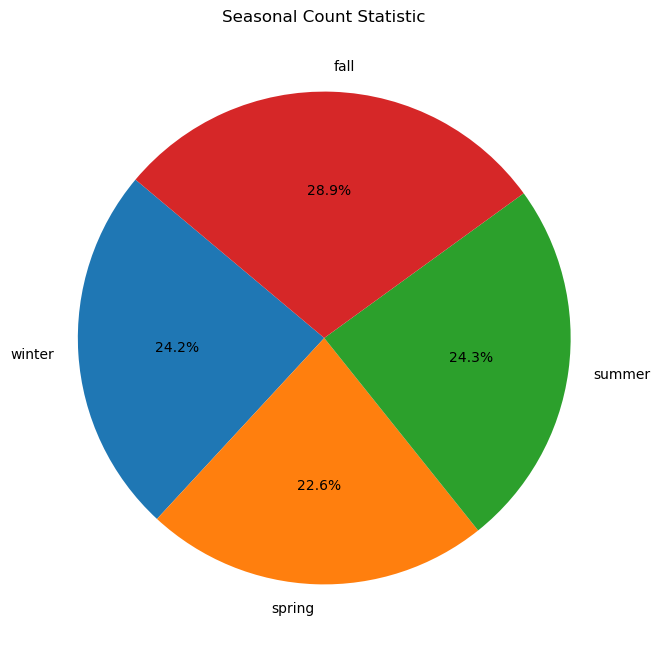

In [416]:
plt.figure(figsize=(8, 8))
plt.pie(sum_season['count'], labels=sum_season.index, autopct='%1.1f%%', startangle=140)
plt.title('Seasonal Count Statistic')
plt.show()


***even though they're close to each other. Higher number of films released in autumn***

## Day Statistic

In [417]:
Day_df=pd.DataFrame(data=df4["Day"].value_counts())
Day_df

,count
Day,
Friday,2053
Thursday,916
Wednesday,795
Tuesday,352
Saturday,237
Monday,233
Sunday,217


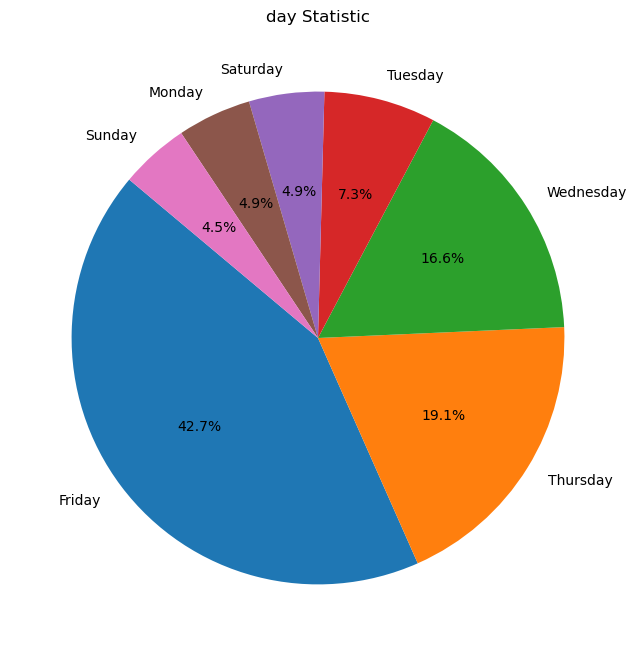

In [418]:
plt.figure(figsize=(8, 8))
plt.pie(Day_df['count'], labels=Day_df.index, autopct='%1.1f%%', startangle=140)
plt.title('day Statistic')
plt.show()


***Here we found a very important statistic. Most of the Friday films were released on Friday, which is especially noticeable. This could be important information for us.***

## Vote Statistic

In [426]:
df4

,original_title,genres,original_language,production_countries,production_companies,release_date,year,month,Day,runtime,status,vote_average,vote_count,popularity
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",en,"United States of America,United Kingdom","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,2009,12,Thursday,162.0,Released,7.2,11800,150.437577
1,Pirates of the Caribbean: At World's End(2007),"Adventure,Fantasy,Action",en,United States of America,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",2007-05-19,2007,5,Saturday,169.0,Released,6.9,4500,139.082615
2,Spectre(2015),"Action,Adventure,Crime",en,"United Kingdom,United States of America","Columbia Pictures,Danjaq,B24",2015-10-26,2015,10,Monday,148.0,Released,6.3,4466,107.376788
3,The Dark Knight Rises(2012),"Action,Crime,Drama,Thriller",en,United States of America,"Legendary Pictures,Warner Bros.,DC Entertainme...",2012-07-16,2012,7,Monday,165.0,Released,7.6,9106,112.312950
4,John Carter(2012),"Action,Adventure,Science Fiction",en,United States of America,Walt Disney Pictures,2012-03-07,2012,3,Wednesday,132.0,Released,6.1,2124,43.926995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,El Mariachi(1992),"Action,Crime,Thriller",es,"Mexico,United States of America",Columbia Pictures,1992-09-04,1992,9,Friday,81.0,Released,6.6,238,14.269792
4799,Newlyweds(2011),"Comedy,Romance",en,,,2011-12-26,2011,12,Monday,85.0,Released,5.9,5,0.642552
4800,"Signed, Sealed, Delivered(2013)","Comedy,Drama,Romance,TV Movie",en,United States of America,"Front Street Pictures,Muse Entertainment Enter...",2013-10-13,2013,10,Sunday,120.0,Released,7.0,6,1.444476
4801,Shanghai Calling(2012),Documentary,en,"United States of America,China",,2012-05-03,2012,5,Thursday,98.0,Released,5.7,7,0.857008


In [445]:
df_vote=df4.sort_values(by=["vote_count","vote_average"],ascending=False)
df_vote.drop(columns=["production_companies","production_countries","original_language","original_language","release_date","status","Day","runtime","month"],axis=1,inplace=True)


In [446]:
df_vote

,original_title,genres,year,vote_average,vote_count,popularity
96,Inception(2010),"Action,Thriller,Science Fiction,Mystery,Adventure",2010,8.1,13752,167.583710
65,The Dark Knight(2008),"Drama,Action,Crime,Thriller",2008,8.2,12002,187.322927
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",2009,7.2,11800,150.437577
16,The Avengers(2012),"Science Fiction,Action,Adventure",2012,7.4,11776,144.448633
788,Deadpool(2016),"Action,Adventure,Comedy",2016,7.4,10995,514.569956
...,...,...,...,...,...,...
4769,The Legend of God's Gun(2007),"Action,Western",2007,0.0,0,0.003582
4771,Her Cry: La Llorona Investigation(2013),Horror,2013,0.0,0,0.056459
4780,Dutch Kills(2015),"Thriller,Crime,Drama",2015,0.0,0,0.038143
4785,Stories of Our Lives(2014),Drama,2014,0.0,0,0.327794


In [452]:
df_vote.head(15)

,original_title,genres,year,vote_average,vote_count,popularity
96,Inception(2010),"Action,Thriller,Science Fiction,Mystery,Adventure",2010,8.1,13752,167.583710
65,The Dark Knight(2008),"Drama,Action,Crime,Thriller",2008,8.2,12002,187.322927
0,Avatar(2009),"Action,Adventure,Fantasy,Science Fiction",2009,7.2,11800,150.437577
16,The Avengers(2012),"Science Fiction,Action,Adventure",2012,7.4,11776,144.448633
788,Deadpool(2016),"Action,Adventure,Comedy",2016,7.4,10995,514.569956
95,Interstellar(2014),"Adventure,Drama,Science Fiction",2014,8.1,10867,724.247784
287,Django Unchained(2012),"Drama,Western",2012,7.8,10099,82.121691
94,Guardians of the Galaxy(2014),"Action,Science Fiction,Adventure",2014,7.9,9742,481.098624
426,The Hunger Games(2012),"Science Fiction,Adventure,Fantasy",2012,6.9,9455,68.550698
127,Mad Max: Fury Road(2015),"Action,Adventure,Science Fiction,Thriller",2015,7.2,9427,434.278564


In [453]:
split_vote= df_vote['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
split_vote.name = 'genre'
df_vote_genres = df_vote.drop('genres', axis=1).join(split_vote)
genre_counts_vote = df_vote_genres['genre'].value_counts()

In [463]:
genre_counts_vote

genre
Drama              2312
Comedy             1728
Thriller           1278
Action             1158
Romance             900
Adventure           792
Crime               698
Science Fiction     537
Horror              522
Family              513
Fantasy             425
Mystery             349
Animation           234
History             197
Music               186
War                 144
Documentary         112
Western              82
Foreign              34
TV Movie              8
comedy                1
action                1
Filmacres             1
Name: count, dtype: int64

In [464]:
df_genre_vote=pd.DataFrame(genre_counts_vote)

In [466]:
df_genre_vote

,count
genre,
Drama,2312
Comedy,1728
Thriller,1278
Action,1158
Romance,900
Adventure,792
Crime,698
Science Fiction,537
Horror,522


***
When the highest votes and number of votes are compared here, most of the productions are drama, Thriller, Action, Romance, adventure productions.

***

## Popularity statistic 


***
The popularity calculation on IMDb is not fully disclosed, because IMDb's popularity calculation method is confidential and there is no official formula or algorithm. 
***

In [450]:
df_pop=df_vote.sort_values("popularity",ascending=False)
df_pop

,original_title,genres,year,vote_average,vote_count,popularity
546,Minions(2015),"Family,Animation,Adventure,Comedy",2015,6.4,4571,875.581305
95,Interstellar(2014),"Adventure,Drama,Science Fiction",2014,8.1,10867,724.247784
788,Deadpool(2016),"Action,Adventure,Comedy",2016,7.4,10995,514.569956
94,Guardians of the Galaxy(2014),"Action,Science Fiction,Adventure",2014,7.9,9742,481.098624
127,Mad Max: Fury Road(2015),"Action,Adventure,Science Fiction,Thriller",2015,7.2,9427,434.278564
...,...,...,...,...,...,...
4625,Midnight Cabaret(1990),Horror,1990,0.0,0,0.001389
4118,Hum To Mohabbat Karega(2000),"Action,Romance,Drama",2000,0.0,0,0.001186
4727,Penitentiary(1979),"Action,Drama",1979,4.9,8,0.001117
3361,Alien Zone(1978),"Horror,Action,Thriller,Science Fiction",1978,4.0,3,0.000372


In [451]:
df_pop.head(15)

,original_title,genres,year,vote_average,vote_count,popularity
546,Minions(2015),"Family,Animation,Adventure,Comedy",2015,6.4,4571,875.581305
95,Interstellar(2014),"Adventure,Drama,Science Fiction",2014,8.1,10867,724.247784
788,Deadpool(2016),"Action,Adventure,Comedy",2016,7.4,10995,514.569956
94,Guardians of the Galaxy(2014),"Action,Science Fiction,Adventure",2014,7.9,9742,481.098624
127,Mad Max: Fury Road(2015),"Action,Adventure,Science Fiction,Thriller",2015,7.2,9427,434.278564
28,Jurassic World(2015),"Action,Adventure,Science Fiction,Thriller",2015,6.5,8662,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,"Adventure,Fantasy,Action",2003,7.5,6985,271.972889
82,Dawn of the Planet of the Apes(2014),"Science Fiction,Action,Drama,Thriller",2014,7.3,4410,243.791743
200,The Hunger Games: Mockingjay - Part 1(2014),"Science Fiction,Adventure,Thriller",2014,6.6,5584,206.227151
88,Big Hero 6(2014),"Adventure,Family,Animation,Action,Comedy",2014,7.8,6135,203.734590
